In [ ]:
#Import  key libraries
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams.update({'font.size': 12})
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

#Import Boston datasets from scikit-learn datasets and load 
boston_data=datasets.load_boston()

#Describe the dataset 
print(boston_data.DESCR)
#print(boston_data)


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
boston_data_df=pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
boston_data_df['Price']=boston_data.target
boston_data_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
#Put the target  in another DataFrame 
target=pd.DataFrame(boston_data.target,columns=['Price'])
#Print first five rows 
target.head(n=5)

,Price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [ ]:
newX=boston_data_df.drop('Price',axis=1)
print(newX)

        CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0    0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1    0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2    0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3    0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4    0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33
..       ...   ...    ...   ...    ...  ...  ...    ...      ...     ...    ...
501  0.06263   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  391.99   9.67
502  0.04527   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   9.08
503  0.06076   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   5.64
504  0.10959   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  393.45   6.48
505  0.04741   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   7.88

[506 rows x 13 columns]


In [ ]:
newY=target['Price']
#refernce https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6 for swplitting the dataset into parts
X_train, X_test, y_train, y_test = train_test_split(newX,newY, test_size=0.3)
print(X_train,y_train)
print(X_test,y_test)

         CRIM    ZN  INDUS  CHAS    NOX  ...   RAD    TAX  PTRATIO       B  LSTAT
442   5.66637   0.0  18.10   0.0  0.740  ...  24.0  666.0     20.2  395.69  16.59
179   0.05780   0.0   2.46   0.0  0.488  ...   3.0  193.0     17.8  396.90   5.04
75    0.09512   0.0  12.83   0.0  0.437  ...   5.0  398.0     18.7  383.23   8.94
205   0.13642   0.0  10.59   0.0  0.489  ...   4.0  277.0     18.6  396.90  10.87
232   0.57529   0.0   6.20   0.0  0.507  ...   8.0  307.0     17.4  385.91   2.47
..        ...   ...    ...   ...    ...  ...   ...    ...      ...     ...    ...
246   0.33983  22.0   5.86   0.0  0.431  ...   7.0  330.0     19.1  390.18   9.16
285   0.01096  55.0   2.25   0.0  0.389  ...   1.0  300.0     15.3  394.72   8.23
356   8.98296   0.0  18.10   1.0  0.770  ...  24.0  666.0     20.2  377.73  17.60
392  11.57790   0.0  18.10   0.0  0.700  ...  24.0  666.0     20.2  396.90  25.68
214   0.28955   0.0  10.59   0.0  0.489  ...   4.0  277.0     18.6  348.93  29.55

[354 rows x 13 

In [ ]:
#Liner Regression 
lr=LinearRegression()

#testing with the test data for linear regression

lr.fit(X_train,y_train)

#score for the LR model

linear_trainig_score=lr.score(X_train,y_train)

print('the score for the linear regression for the training data is: ',linear_trainig_score)

the score for the linear regression for the training data is:  0.7300662914425737


In [ ]:
#Ridge Regression
# refernce https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html for Ridge regression syntax
rr1=Ridge(alpha=0.01)
rr2=Ridge(alpha=100)

#testing with the test data for ridge regression
rr1.fit(X_train,y_train)
rr2.fit(X_train,y_train)

#score for the Ridge model
rigde1_training_score=rr1.score(X_train,y_train)
rigde2_training_score=rr2.score(X_train,y_train)

print('the score for the ridge regression with alpha 0.01 for the training data is: ',(rigde1_training_score))
print('the score for the ridge regression with alpha 100 for the training data is: ',(rigde2_training_score))



the score for the ridge regression with alpha 0.01 for the training data is:  0.7300652990785936
the score for the ridge regression with alpha 100 for the training data is:  0.7048452513592196


Is there any difference between the Ridge models with a lower and a higher alpha?



Ans: The ridge model with a lower alpha value is has almost the same test and training score as the linear regression model and when we plot the graph for the coefficients for this model we can see that the coefficient's magnitude is varying but on the other hand the plot from the higher alpha value is more smoother and constant.

In [ ]:
#Computing for the Test datasets

#for linear regression
lr.fit(X_test,y_test)

linear_test_score=lr.score(X_test,y_test)
print('the testing score for the linear regression is',linear_test_score)

#For Ridge Regression

rr1.fit(X_test,y_test)
rr2.fit(X_test,y_test)

rigde1_test_score=rr1.score(X_test,y_test)
rigde2_test_score=rr2.score(X_test,y_test)

print('the testing score for the ridge model with the alpha value as 0.01 is',rigde1_test_score)
print('the testing score for the ridge model with the alpha value as 100 is',rigde2_test_score)

the testing score for the linear regression is 0.7999036238824504
the testing score for the ridge model with the alpha value as 0.01 is 0.7998995595042516
the testing score for the ridge model with the alpha value as 100 is 0.7409279770136696


In [ ]:
liner_coeff=lr.coef_
ridge1_coeff=rr1.coef_
ridge2_coeff=rr2.coef_

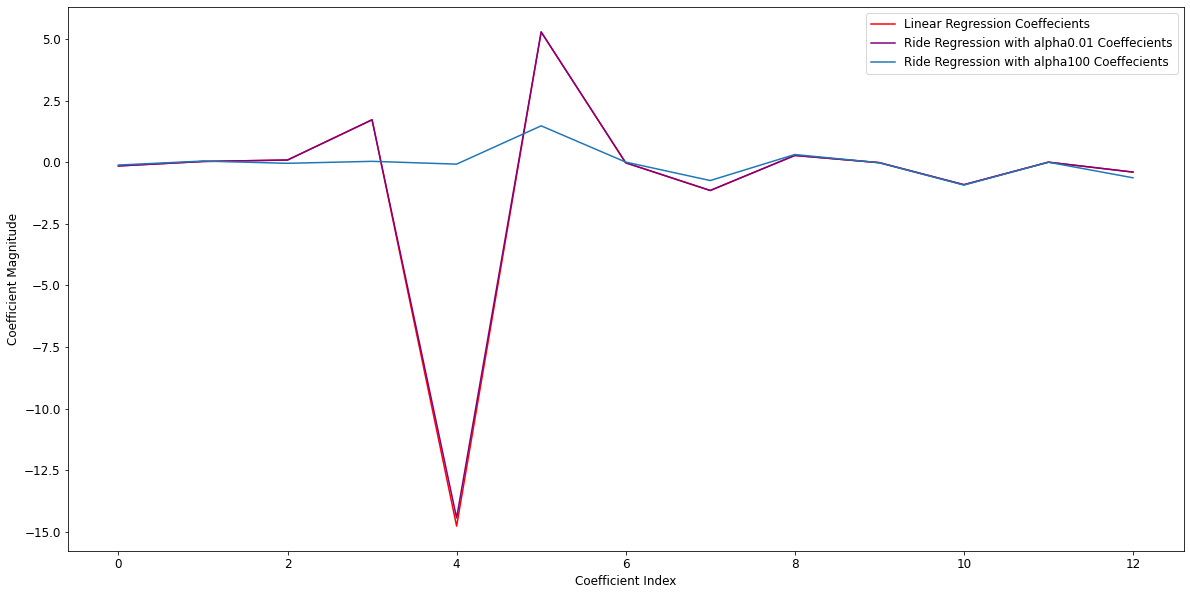

In [ ]:
#plotting the graph
plt.figure(figsize=(20,10))
plt.plot(liner_coeff,color='Red',label='Linear Regression Coeffecients')
plt.plot(ridge1_coeff,color='Purple',label='Ride Regression with alpha0.01 Coeffecients')
plt.plot(ridge2_coeff,label='Ride Regression with alpha100 Coeffecients')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.legend()